# Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

# Importing the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\traffic volume.csv")

# Analysing the Data

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


# Checking the null values

In [6]:
data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

# Handling the missing values

In [7]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

In [8]:
from collections import Counter

In [9]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [10]:
data['weather'].fillna('Clouds',inplace=True)

In [11]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

# Encoding the data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
data['weather'] = le.fit_transform(data['weather'])

In [15]:
data['holiday'] = le.fit_transform(data['holiday'])

In [16]:
import matplotlib.pyplot as plt

In [17]:
data.corr()

,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,-0.000472,0.000066,0.000432,-0.004328,0.018676
temp,-0.000472,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000066,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000432,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.004328,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.018676,0.130034,0.004714,0.000735,-0.040035,1.000000


In [18]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


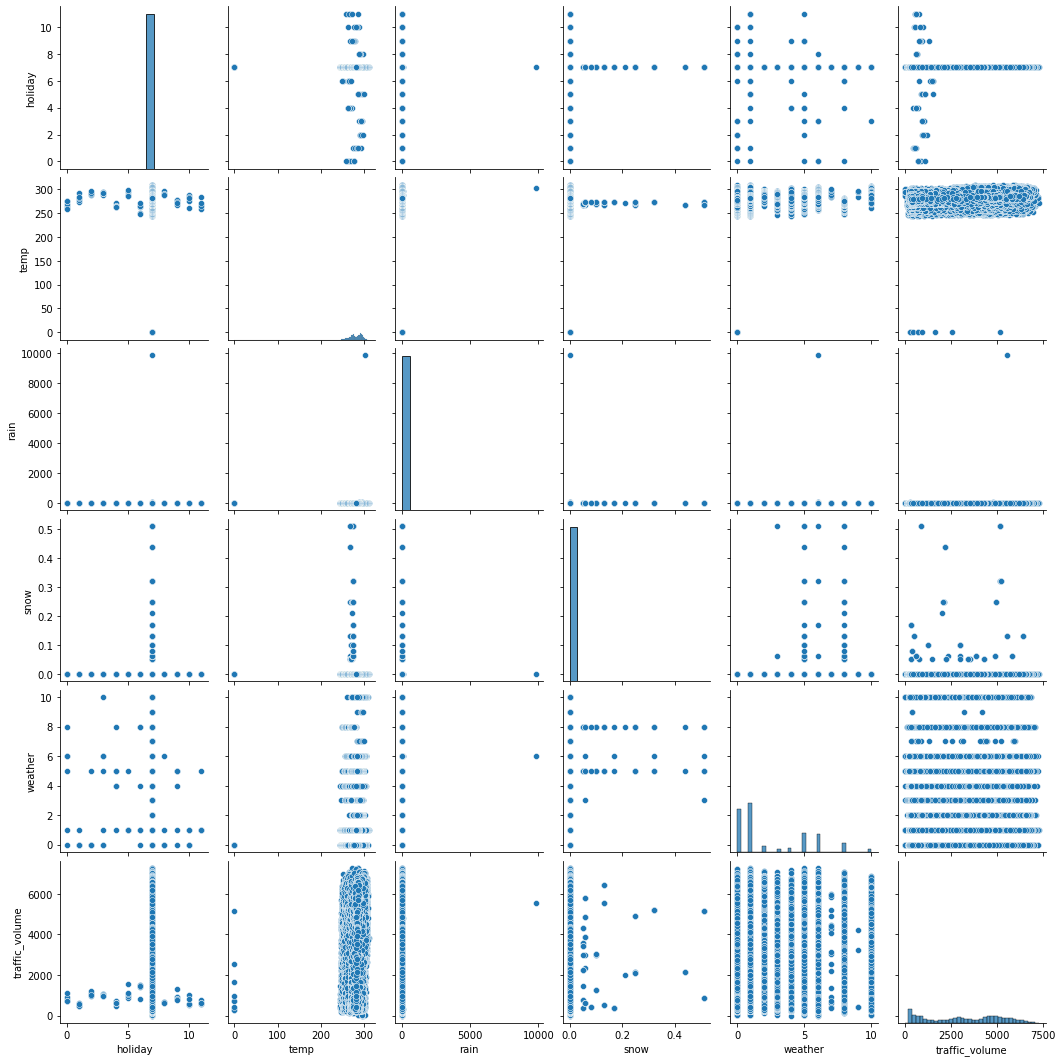

In [19]:
sns.pairplot(data)

<AxesSubplot:>

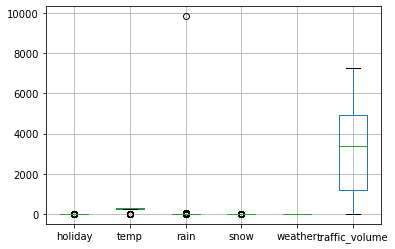

In [20]:
data.boxplot()

In [21]:
data.corr()

,holiday,temp,rain,snow,weather,traffic_volume
holiday,1.000000,-0.000472,0.000066,0.000432,-0.004328,0.018676
temp,-0.000472,1.000000,0.009070,-0.019758,-0.033559,0.130034
rain,0.000066,0.009070,1.000000,-0.000090,0.009542,0.004714
snow,0.000432,-0.019758,-0.000090,1.000000,0.036662,0.000735
weather,-0.004328,-0.033559,0.009542,0.036662,1.000000,-0.040035
traffic_volume,0.018676,0.130034,0.004714,0.000735,-0.040035,1.000000


# Splitting Date and Time

In [22]:
data[["day","month","year"]] = data["date"].str.split("-", expand = True)

In [23]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [24]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [25]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


# Splitting The Dataset Into Dependent And Independent Variable

In [26]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'],axis=1)

In [27]:
names = x.columns

# Feature scaling

In [28]:
from sklearn.preprocessing import scale

In [29]:
x = scale(x)

In [30]:
x = pd.DataFrame(x,columns=names)

In [31]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


# Splitting The Data Into Train And Test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

# Training And Testing The Model

# Initializing the model

In [34]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


# Fitting the models with x_train and y_train

In [35]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

Fitting the models with x_train and y_train

In [36]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Predicting the y_train values and calculate the accuracy

In [37]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

# Regression Evaluation Metrics

In [38]:
from sklearn import metrics

#  R-squared _score 

In [39]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636891
1.0
0.9748652589734118
-12.188104231382285
0.8349874938269883


In [40]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [41]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.399396398322208
0.6929568578898734
0.8025389977869495
-11.972215715232434
0.7922184852381723


# RMSE –Root Mean Square Error

In [42]:
MSE = metrics.mean_squared_error(p3,y_test)

In [43]:
np.sqrt(MSE)

799.8784771647161

# Saving the Model

In [44]:
import pickle

In [45]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))